<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2_n20.csv',
 'data_multi_delta_-2_n30.csv',
 'data_multi_delta_-2_n60.csv',
 'data_multi_delta_-2_n120.csv',
 'data_multi_delta_-2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,91.145916,95.435123,22.324054,-0.001518,218.903574,218.903520,0.000055
1,0.0,1.0,49.702676,58.791629,96.992505,0.001194,215.488004,215.490713,-0.002709
2,0.0,2.0,59.618715,24.313133,48.217774,-0.000682,142.148941,142.141384,0.007556
3,0.0,3.0,34.236554,53.735092,51.971321,-0.002279,149.940687,149.943440,-0.002752
4,0.0,4.0,43.357100,46.285234,21.277339,0.003117,120.922788,120.914748,0.008040
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,82.436263,84.547659,58.233433,0.003475,235.220829,235.229186,-0.008357
29996,999.0,26.0,74.258170,36.604036,71.017144,-0.010507,191.868843,191.866137,0.002706
29997,999.0,27.0,26.046115,96.589930,23.828491,-0.003355,156.461181,156.467250,-0.006070
29998,999.0,28.0,71.946065,83.155905,29.978774,0.002257,195.083001,195.087434,-0.004433


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,91.145916,95.435123,22.324054,-0.001518,218.903574,218.903520,0.000055
1,0.0,1.0,49.702676,58.791629,96.992505,0.001194,215.488004,215.490713,-0.002709
2,0.0,2.0,59.618715,24.313133,48.217774,-0.000682,142.148941,142.141384,0.007556
3,0.0,3.0,34.236554,53.735092,51.971321,-0.002279,149.940687,149.943440,-0.002752
4,0.0,4.0,43.357100,46.285234,21.277339,0.003117,120.922788,120.914748,0.008040
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,82.436263,84.547659,58.233433,0.003475,235.220829,235.229186,-0.008357
29996,999.0,26.0,74.258170,36.604036,71.017144,-0.010507,191.868843,191.866137,0.002706
29997,999.0,27.0,26.046115,96.589930,23.828491,-0.003355,156.461181,156.467250,-0.006070
29998,999.0,28.0,71.946065,83.155905,29.978774,0.002257,195.083001,195.087434,-0.004433


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    91.145916  95.435123  22.324054  ...  218.903574  218.903520  0.000055
      1.0    49.702676  58.791629  96.992505  ...  215.488004  215.490713 -0.002709
      2.0    59.618715  24.313133  48.217774  ...  142.148941  142.141384  0.007556
      3.0    34.236554  53.735092  51.971321  ...  149.940687  149.943440 -0.002752
      4.0    43.357100  46.285234  21.277339  ...  120.922788  120.914748  0.008040
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   82.436263  84.547659  58.233433  ...  235.220829  235.229186 -0.008357
      26.0   74.258170  36.604036  71.017144  ...  191.868843  191.866137  0.002706
      27.0   26.046115  96.589930  23.828491  ...  156.461181  156.467250 -0.006070
      28.0   71.946065  83.155905  29.978774  ...  195.083001  195.087434 -0.004433
      29.0   45.223417  76.124154  72.741153  ...  204.070753  204.089041 -0.018288

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    91.145916  95.435123  22.324054  ...  218.903574  218.903520  0.000055
      1.0    49.702676  58.791629  96.992505  ...  215.488004  215.490713 -0.002709
      2.0    59.618715  24.313133  48.217774  ...  142.148941  142.141384  0.007556
      3.0    34.236554  53.735092  51.971321  ...  149.940687  149.943440 -0.002752
      4.0    43.357100  46.285234  21.277339  ...  120.922788  120.914748  0.008040
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   82.436263  84.547659  58.233433  ...  235.220829  235.229186 -0.008357
      26.0   74.258170  36.604036  71.017144  ...  191.868843  191.866137  0.002706
      27.0   26.046115  96.589930  23.828491  ...  156.461181  156.467250 -0.006070
      28.0   71.946065  83.155905  29.978774  ...  195.083001  195.087434 -0.004433
      29.0   45.223417  76.124154  72.741153  ...  204.070753  204.089041 -0.018288

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,91.145916,95.435123,22.324054,-0.001518,218.903574,218.903520,0.000055
1,0.0,1.0,49.702676,58.791629,96.992505,0.001194,215.488004,215.490713,-0.002709
2,0.0,2.0,59.618715,24.313133,48.217774,-0.000682,142.148941,142.141384,0.007556
3,0.0,3.0,34.236554,53.735092,51.971321,-0.002279,149.940687,149.943440,-0.002752
4,0.0,4.0,43.357100,46.285234,21.277339,0.003117,120.922788,120.914748,0.008040
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,82.436263,84.547659,58.233433,0.003475,235.220829,235.229186,-0.008357
29996,999.0,26.0,74.258170,36.604036,71.017144,-0.010507,191.868843,191.866137,0.002706
29997,999.0,27.0,26.046115,96.589930,23.828491,-0.003355,156.461181,156.467250,-0.006070
29998,999.0,28.0,71.946065,83.155905,29.978774,0.002257,195.083001,195.087434,-0.004433


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    91.145916  95.435123  22.324054  ...  218.903574  218.903520  0.000055
      1.0    49.702676  58.791629  96.992505  ...  215.488004  215.490713 -0.002709
      2.0    59.618715  24.313133  48.217774  ...  142.148941  142.141384  0.007556
      3.0    34.236554  53.735092  51.971321  ...  149.940687  149.943440 -0.002752
      4.0    43.357100  46.285234  21.277339  ...  120.922788  120.914748  0.008040
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   82.436263  84.547659  58.233433  ...  235.220829  235.229186 -0.008357
      26.0   74.258170  36.604036  71.017144  ...  191.868843  191.866137  0.002706
      27.0   26.046115  96.589930  23.828491  ...  156.461181  156.467250 -0.006070
      28.0   71.946065  83.155905  29.978774  ...  195.083001  195.087434 -0.004433
      29.0   45.223417  76.124154  72.741153  ...  204.070753  204.089041 -0.018288

[30000 rows x 7 columns]

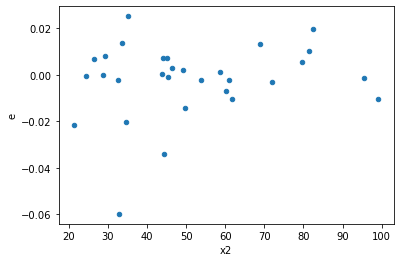

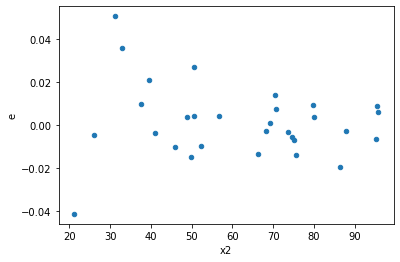

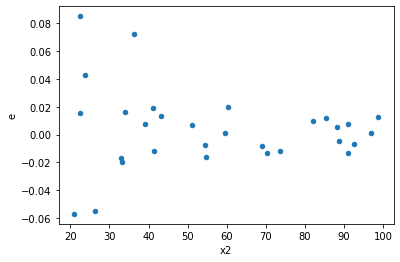

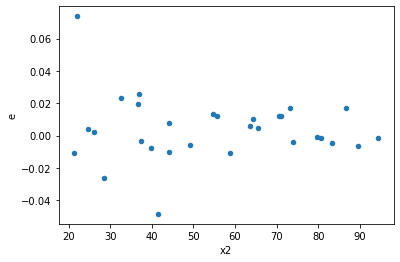

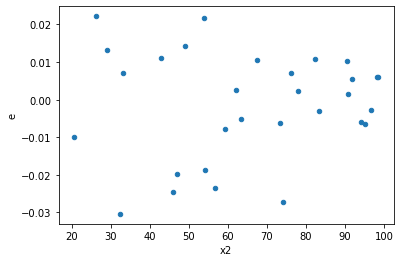

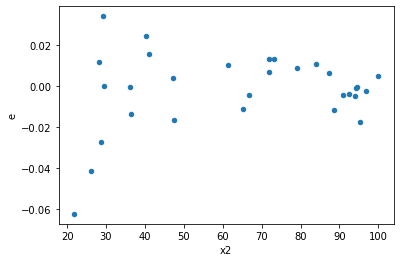

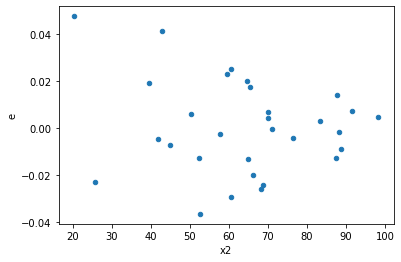

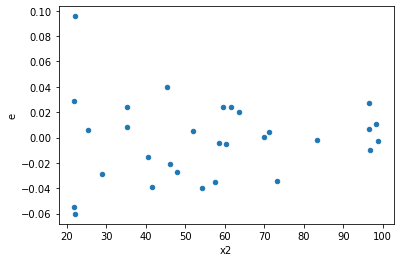

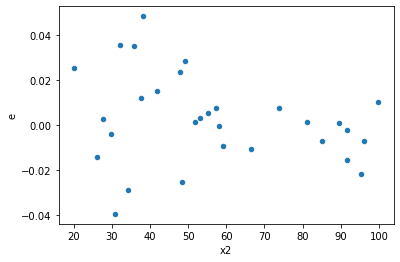

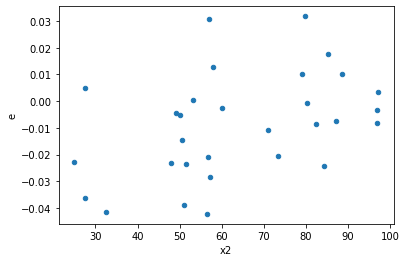

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
156.0,9.0,9.0,0.0005291134976368076,0.0013297944299410995,5.8790388626311956e-05,0.00014775493666012215,2.513249871493342,0.18599771987118063,0.9070011400644097,0.09299885993559032,Reject001=1 : Homoscedasticity
217.0,9.0,9.0,0.0011312278928255837,0.0019086176118748403,0.00012569198809173152,0.00021206862354164891,1.6872087613641586,0.447851504357516,0.776074247821242,0.223925752178758,Reject001=1 : Homoscedasticity
229.0,9.0,9.0,0.000825089976021504,0.001482269266989069,9.167666400238932e-05,0.00016469658522100765,1.796494091633998,0.39593241823717573,0.8020337908814121,0.19796620911858787,Reject001=1 : Homoscedasticity
447.0,9.0,9.0,0.0012696354837281125,0.0017581656695049947,0.0001410706093031236,0.00019535174105611054,1.3847798774041662,0.6355363088999675,0.6822318455500163,0.31776815444998374,Reject001=1 : Homoscedasticity
451.0,9.0,9.0,0.0010777850635780549,0.0019694254780446424,0.0001197538959531172,0.00021882505311607138,1.8272896374222332,0.38255863690199754,0.8087206815490012,0.19127931845099877,Reject001=1 : Homoscedasticity
469.0,9.0,9.0,0.0013429647164341968,0.0020684439725900928,0.00014921830182602186,0.00022982710806556588,1.540207234991377,0.5301290944490598,0.7349354527754701,0.2650645472245299,Reject001=1 : Homoscedasticity
475.0,9.0,9.0,0.0013578331013556152,0.0019826059207904414,0.00015087034459506835,0.0002202895467544935,1.4601248996000127,0.5818587321203172,0.7090706339398414,0.2909293660601586,Reject001=1 : Homoscedasticity
552.0,9.0,9.0,0.002293206854439963,0.002450586003460788,0.00025480076160444033,0.0002722873337178653,1.0686284138372066,0.9228588763494137,0.5385705618252932,0.46142943817470683,Reject001=1 : Homoscedasticity
706.0,9.0,9.0,0.002459494474267462,0.0026567886724478446,0.00027327716380749577,0.00029519874138309385,1.0802173781013047,0.9103751308148353,0.5448124345925823,0.45518756540741767,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,0.002972863836406157,0.0008223081760113686,0.0003303182040451286,9.136757511237429e-05,0.27660472233583444,0.06912332847029601,Reject001=1 : Homoscedasticity
1.0,9.0,9.0,0.005504119202840131,0.0004577484307845829,0.0006115688003155702,5.086093675384254e-05,0.08316470154723106,0.001017009685407244,Reject001=0 : Heteroscedasticity
2.0,9.0,9.0,0.01905478369269439,0.0005692766341729738,0.0021171981880771544,6.325295935255264e-05,0.029875785700534327,1.4688607477300568e-05,Reject001=0 : Heteroscedasticity
3.0,9.0,9.0,0.004469482925884232,0.0006108839002689384,0.0004966092139871369,6.787598891877094e-05,0.13667887547597748,0.00669417618903838,Reject001=0 : Heteroscedasticity
4.0,9.0,9.0,0.0028881474833362506,0.0002807187917768413,0.0003209052759262501,3.119097686409348e-05,0.09719683409400143,0.0018673898882309464,Reject001=0 : Heteroscedasticity
5.0,9.0,9.0,0.006924251612733828,0.0003542215667777391,0.0007693612903037587,3.9357951864193236e-05,0.051156657295110285,0.0001422180147113208,Reject001=0 : Heteroscedasticity
6.0,9.0,9.0,0.0067276403181816555,0.001017198236172409,0.0007475155909090728,0.00011302202624137878,0.1511968815311662,0.009615457698286882,Reject001=0 : Heteroscedasticity
7.0,9.0,9.0,0.019585528659193902,0.0025274227903428767,0.002176169851021545,0.00028082475448254187,0.12904542094943378,0.005428130990231324,Reject001=0 : Heteroscedasticity
8.0,9.0,9.0,0.0072546836465588755,0.0007977206850382463,0.000806075960728764,8.863563167091625e-05,0.10995940331824534,0.002990458306352302,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      543
Reject001=0 : Heteroscedasticity    457
Name: Result_test, dtype: int64